In [133]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [134]:
data_ori = pd.read_csv('heros.csv', encoding='gbk')

In [135]:
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力',u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防',u'最大每5秒回血',u'每5秒回血成长',u'初始每5秒回血',u'最大每5秒回蓝',u'每5秒回蓝成长',u'初始每5秒回蓝',u'最大攻速',u'攻击范围']

In [136]:
data = data_ori[features]

In [137]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [138]:
corr = data[features].corr()

In [139]:
plt.figure(figsize=(14,14))

<Figure size 1008x1008 with 0 Axes>

<Figure size 1008x1008 with 0 Axes>

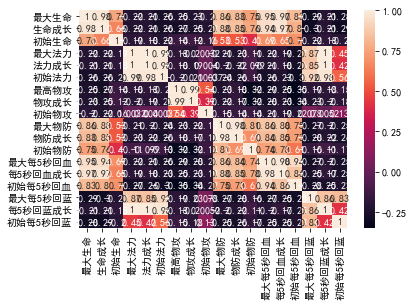

In [140]:
sns.heatmap(corr, annot=True)

In [141]:
features_remains = [u'最大生命',u'初始生命',u'最大法力',u'最高物攻',u'初始物攻',u'最大物防',u'初始物防',u'最大每5秒回血',u'初始每5秒回血',u'最大每5秒回蓝',u'初始每5秒回蓝',u'最大攻速',u'攻击范围']

In [142]:
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data[u'攻击范围'] = data[u'攻击范围'].map({'远程':1,'近战':0})

d:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
d:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [143]:
ss = StandardScaler()

In [144]:
data = ss.fit_transform(data)
data

d:\python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
d:\python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.76655803,  0.74712079,  0.4676386 , ...,  0.06536709,
         0.49421293, -0.82639387],
       [ 0.41790601,  0.52876339, -0.36420523, ...,  0.06536709,
        -0.66174274, -0.82639387],
       [ 1.75374132,  1.38953459,  1.22530527, ..., -1.09112752,
        -0.66174274, -0.82639387],
       ...,
       [-0.34713614, -0.49973162,  0.38816307, ...,  0.52796493,
        -0.66174274, -0.82639387],
       [ 0.11906142, -0.06459912,  0.82792765, ...,  0.18101655,
         0.49421293, -0.82639387],
       [-0.96574444, -0.89372432, -1.05829149, ...,  0.18101655,
         0.49421293,  1.21007674]])

In [145]:
gmm = GaussianMixture(n_components = 30, covariance_type='full')

In [146]:
gmm.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=30, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [147]:
prediction = gmm.predict(data)

In [148]:
print(prediction)

[25  1  8  2 16 16 13  8 24 26 11  1  2 22 15 11 29 24  3  7  5  7  7  7
  7  7  7  4 17  0 22 17 12 17 17 17 17 18  0 27 12 17 17 12 17 27 28  0
  1  9 10  6  3 19 19 25 14  6 23 16 14  3 20 25 21  6  6 27  4]


In [149]:
data_ori.insert(0,'分组',prediction)

In [150]:
data_ori.to_csv('hero_out.csv',index=False,sep=',')

In [151]:
data_ori

,分组,英雄,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,...,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围,主要定位,次要定位
0,25,夏侯惇,7350,288.8,3307,1746,94,430,321,11.570,...,98,3.357,51,37,1.571,15,28.00%,近战,坦克,战士
1,1,钟无艳,7000,275.0,3150,1760,95,430,318,11.000,...,92,3.143,48,37,1.571,15,14.00%,近战,战士,坦克
2,8,张飞,8341,329.4,3450,100,0,100,301,10.570,...,115,4.143,57,5,0.000,5,14.00%,近战,坦克,辅助
3,2,牛魔,8476,352.8,3537,1926,104,470,273,8.357,...,117,4.214,58,42,1.786,17,14.00%,近战,坦克,辅助
4,16,吕布,7344,270.0,3564,0,0,0,343,12.360,...,97,3.071,54,0,0.000,0,14.00%,近战,战士,坦克
5,16,亚瑟,8050,316.3,3622,0,0,0,346,13.000,...,106,3.643,55,0,0.000,0,14.00%,近战,战士,坦克
6,13,芈月,6164,281.5,3105,100,0,100,289,9.786,...,77,2.357,44,0,0.000,0,0.00%,远程,法师,坦克
7,8,程咬金,8611,369.6,3437,0,0,0,316,11.070,...,119,4.429,57,0,0.000,0,28.00%,近战,坦克,战士
8,24,廉颇,9328,412.1,3558,1708,92,420,286,8.786,...,128,4.929,59,36,1.500,15,14.00%,近战,坦克,NaN
9,26,东皇太一,7669,319.1,3201,1926,104,470,286,8.786,...,106,3.786,53,42,1.786,17,14.00%,近战,坦克,NaN


In [125]:
from sklearn.metrics import calinski_harabaz_score

In [126]:
print(calinski_harabaz_score(data,prediction))

22.08458952743741
